# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV

### Импорт библиотек ⬇

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

### Введём заданные переменные

In [2]:
BUDGET = 10*10**9 # бюджет - 10_000_000
PRICE = 450000 # цена - 450_000
POINTS = 200 # точки для разработки 200

## Загрузка и подготовка данных

### Первый регоион

In [3]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
display(df_1)
df_1.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


    Все данные в норме

#### Удалим лишний столбец

    Для обучения модели, столбец "id" нам не понадобится. Удалим его.

In [4]:
df_1 = df_1.drop(['id'], axis=1)
display(df_1.head(2))

,f0,f1,f2,product
0,0.705745,-0.497823,1.22117,105.280062
1,1.334711,-0.340164,4.36508,73.037750


#### Посмотрим зависимость данных

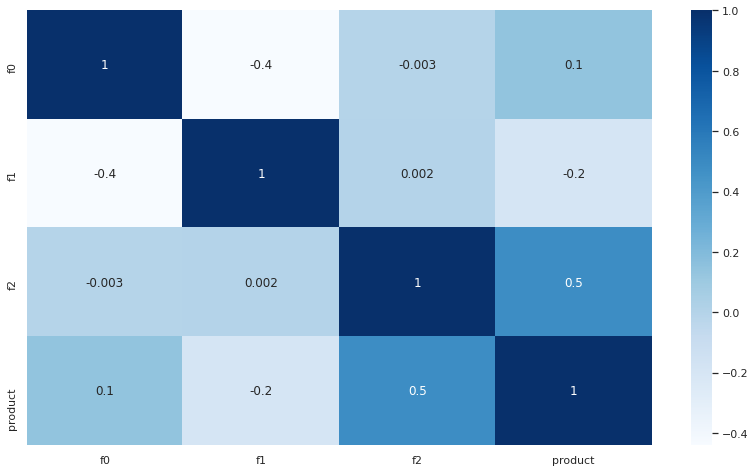

In [5]:
plt.figure(figsize=(14,8));
sns.set_theme(style="white");
corr = df_1.corr();
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g');

#### Разделим данные на валидационную и тестовую выборки

In [6]:
df_1_train, df_1_valid = train_test_split(df_1, test_size=0.25, random_state=12345) # валидационная выборка

In [7]:
print('df_1:', df_1.shape[0])
print('train_1:', (df_1_train.shape[0]*100) / df_1.shape[0],'%')
print('valid_1:', (df_1_valid.shape[0]*100) / df_1.shape[0],'%')

df_1: 100000
train_1: 75.0 %
valid_1: 25.0 %


In [8]:
features_train_1 = df_1_train.drop(['product'], axis=1)
target_train_1 = df_1_train['product']

features_valid_1 = df_1_valid.drop(['product'], axis=1)
target_valid_1 = df_1_valid['product']

#### Маштабируем признаки

In [9]:
numeric = ['f0', 'f1', 'f2']
scaler1 = StandardScaler()
scaler1.fit(features_train_1[numeric])
features_train_1[numeric] = scaler1.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler1.transform(features_valid_1[numeric])

### Второй регоион

In [10]:
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
display(df_2)
df_2.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


    Все данные в норме

#### Удалим лишний столбец

    Для обучения модели, столбец "id" нам не понадобится. Удалим его.

In [11]:
df_2 = df_2.drop(['id'], axis=1)
display(df_2.head(2))

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261


#### Посмотрим зависимость данных

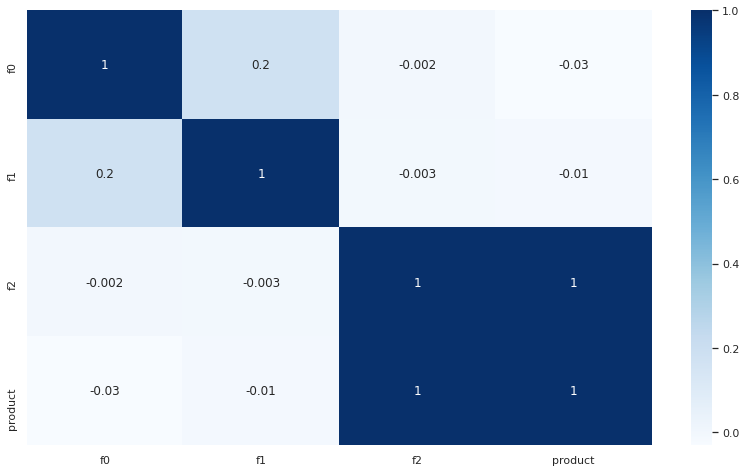

In [12]:
plt.figure(figsize=(14,8));
sns.set_theme(style="white");
corr = df_2.corr();
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g');

#### Разделим данные на валидационную и тестовую выборки

In [13]:
df_2_train, df_2_valid = train_test_split(df_2, test_size=0.25, random_state=12345) # валидационная выборка

In [14]:
print('df_2:', df_2.shape[0])
print('train_2:', (df_2_train.shape[0]*100) / df_2.shape[0],'%')
print('valid_2:', (df_2_valid.shape[0]*100) / df_2.shape[0],'%')

df_2: 100000
train_2: 75.0 %
valid_2: 25.0 %


In [15]:
features_train_2 = df_2_train.drop(['product'], axis=1)
target_train_2 = df_2_train['product']

features_valid_2 = df_2_valid.drop(['product'], axis=1)
target_valid_2 = df_2_valid['product']

#### Маштабируем признаки

In [16]:
numeric = ['f0', 'f1', 'f2']
scaler2 = StandardScaler()
scaler2.fit(features_train_2[numeric])
features_train_2[numeric] = scaler2.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler2.transform(features_valid_2[numeric])

### Третий регоион

In [17]:
df_3 = pd.read_csv('/datasets/geo_data_2.csv')
display(df_3)
df_3.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


    Все данные в норме

#### Удалим лишний столбец

    Для обучения модели, столбец "id" нам не понадобится. Удалим его.

In [18]:
df_3 = df_3.drop(['id'], axis=1)
display(df_3.head(2))

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697


#### Посмотрим зависимость данных

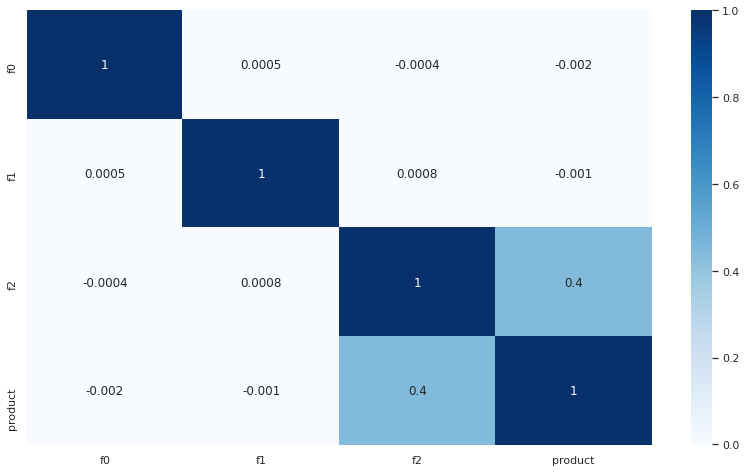

In [19]:
plt.figure(figsize=(14,8));
sns.set_theme(style="white");
corr = df_3.corr();
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g');

#### Разделим данные на валидационную и тестовую выборки

In [20]:
df_3_train, df_3_valid = train_test_split(df_3, test_size=0.25, random_state=12345) # валидационная выборка

In [21]:
print('df_3:', df_3.shape[0])
print('train_3:', (df_3_train.shape[0]*100) / df_3.shape[0],'%')
print('valid_3:', (df_3_valid.shape[0]*100) / df_3.shape[0],'%')

df_3: 100000
train_3: 75.0 %
valid_3: 25.0 %


In [22]:
features_train_3 = df_3_train.drop(['product'], axis=1)
target_train_3 = df_3_train['product']

features_valid_3 = df_3_valid.drop(['product'], axis=1)
target_valid_3 = df_3_valid['product']

#### Маштабируем признаки

In [23]:
numeric = ['f0', 'f1', 'f2']
scaler3 = StandardScaler()
scaler3.fit(features_train_3[numeric])
features_train_3[numeric] = scaler3.transform(features_train_3[numeric])
features_valid_3[numeric] = scaler3.transform(features_valid_3[numeric])

## Обучение и проверка модели

### Первый регоион

In [24]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predict_valid_1 = model_1.predict(features_valid_1)

In [25]:
result_1_bbls = predict_valid_1.mean()
result_1_RMSE = mean_squared_error(target_valid_1, predict_valid_1, squared=False)
print('Cредний запас предсказанного сырья на валидационной выборке:', result_1_bbls.round(3))
print('RMSE модели линейной регрессии на валидационной выборке:', result_1_RMSE.round(3))

Cредний запас предсказанного сырья на валидационной выборке: 92.593
RMSE модели линейной регрессии на валидационной выборке: 37.579


### Второй регоион

In [26]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predict_valid_2 = model_2.predict(features_valid_2)

In [27]:
result_2_bbls = predict_valid_2.mean()
result_2_RMSE = mean_squared_error(target_valid_2, predict_valid_2, squared=False)
print('Cредний запас предсказанного сырья на валидационной выборке:', result_2_bbls.round(3))
print('RMSE модели линейной регрессии на валидационной выборке:', result_2_RMSE.round(3))

Cредний запас предсказанного сырья на валидационной выборке: 68.729
RMSE модели линейной регрессии на валидационной выборке: 0.893


### Третий регоион

In [28]:
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3)
predict_valid_3 = model_3.predict(features_valid_3)

In [29]:
result_3_bbls = predict_valid_3.mean()
result_3_RMSE = mean_squared_error(target_valid_3, predict_valid_3, squared=False)
print('Cредний запас предсказанного сырья на валидационной выборке:', result_3_bbls.round(3))
print('RMSE модели линейной регрессии на валидационной выборке:', result_3_RMSE.round(3))

Cредний запас предсказанного сырья на валидационной выборке: 94.965
RMSE модели линейной регрессии на валидационной выборке: 40.03


### вывод
    -Самый богатый регион - Третий
    -Самый бедный регион - Второй
    
    -Самая малая RMSE во Втором регионе, что говорит нам о довольно точных данных
    -Самая большая RMSE в Третьем регионе

## Подготовка к расчёту прибыли

### Посмотрим превышает ли среднее количество продукта на точку по каждому региону достаточный объем сырья для безубыточной добычи

In [30]:
quantity = BUDGET/PRICE
print('Необходимое кол-во продукта для 200 точек, чтобы выйти в "0":', quantity)

Необходимое кол-во продукта для 200 точек, чтобы выйти в "0": 22222.222222222223


In [31]:
quantity_for_1 = quantity / POINTS
print('Достаточный объём сырья для безубыточной разработки одной скважины', quantity_for_1)

Достаточный объём сырья для безубыточной разработки одной скважины 111.11111111111111


### Первый регоион

In [32]:
print('Cредний запас предсказанного сырья:', result_1_bbls)
print('Достаточный объём сырья для безубыточной разработки одной скважины:', quantity_for_1)

Cредний запас предсказанного сырья: 92.59256778438035
Достаточный объём сырья для безубыточной разработки одной скважины: 111.11111111111111


### Второй регоион

In [33]:
print('Cредний запас предсказанного сырья:', result_2_bbls)
print('Достаточный объём сырья для безубыточной разработки одной скважины:', quantity_for_1)

Cредний запас предсказанного сырья: 68.728546895446
Достаточный объём сырья для безубыточной разработки одной скважины: 111.11111111111111


### Третий регоион

In [34]:
print('Cредний запас предсказанного сырья:', result_3_bbls)
print('Достаточный объём сырья для безубыточной разработки одной скважины:', quantity_for_1)

Cредний запас предсказанного сырья: 94.96504596800489
Достаточный объём сырья для безубыточной разработки одной скважины: 111.11111111111111


    Видим что ни один регион не имеет достаточного объёма сырья для выхода в "0" или в прибыль

## Расчёт прибыли и рисков 

In [35]:
'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())

'Риск убытков = 50.00% '

    Для дальнейших расчетов необходимо использовать предсказания и целевой для валидационной выборки

### Создадим функцию:

#### прибыли

In [36]:
def profit(pf):
    ''' сортируем по предсказаниям'''
    pf_sorted = pf.sort_values(by = 'pred', ascending=False)
    ''' берем первые 200 реальных значений продукта'''    
    target_sorted = pf_sorted['product'][:POINTS]

    product = target_sorted.sum()
    return product * PRICE - BUDGET       

#### Bootstrap

In [37]:
state = np.random.RandomState(12345)

def bootstr(btr):
    values = []
    for i in range(1000):
        ''' нам надо выбрать 500 случайных значений из датасета, к-й содержит предсказания и таргет_валид'''
        data_500 = btr.sample(500, replace=True, random_state=state)
        ''' подаем 500 случайных наблюдений из датасета в функцию прибыли'''
        values.append(profit(data_500)) 
    ''' получили 1000 вариантов(значений) прибыли'''
    values = pd.Series(values)
    values_mean = values.mean()
    print(values_mean.round(3))

    upper_q = values.quantile(0.975)
    lower_q = values.quantile(0.025)
    print('upper_q:', upper_q.round(3))
    print('lower_q:', lower_q.round(3))
    
    #'Риск убытков = {:.2%} '.format((pd.Series([-2, -1, 4, 5])<0).mean())
    
    print('Риск убытков = {:.2%} '.format((values<0).mean()))

### Первый регоион

In [38]:
data_1 = pd.DataFrame(target_valid_1)
data_1['pred'] = predict_valid_1
display(data_1.head(2))

,product,pred
71751,10.038645,95.894952
80493,114.551489,77.572583


In [39]:
bootstr(data_1)

396164984.802
upper_q: 909766941.553
lower_q: -111215545.89
Риск убытков = 6.90% 


### Второй регоион

In [40]:
data_2 = pd.DataFrame(target_valid_2)
data_2['pred'] = predict_valid_2
display(data_2.head(2))

,product,pred
71751,80.859783,82.663314
80493,53.906522,54.431786


In [41]:
bootstr(data_2)

461155817.277
upper_q: 862952060.264
lower_q: 78050810.752
Риск убытков = 0.70% 


### Третий регоион

In [42]:
data_3 = pd.DataFrame(target_valid_3)
data_3['pred'] = predict_valid_3
display(data_3.head(2))

,product,pred
71751,61.212375,93.599633
80493,41.850118,75.105159


In [43]:
bootstr(data_3)

392950475.171
upper_q: 934562914.551
lower_q: -112227625.379
Риск убытков = 6.50% 


### Вывод

Проведя анализ трёх регионов мы можем сделать вывод, что:
    
    -Первый регион в среднем даст 396_164_984,802 прибыли, что является самым низким показателем. Также этот регион имеет самый большой риск убытков - 6,9%
        
    -Второй регион в среднем даст 461_155_817,277 прибыли, что является самым высоким показателем. Также этот регион имеет самый маленький риск убытков - 0,7%
        
    -Третий регион в среднем даст 392_950_475,171 прибыли, что является средним показателем среди всех регионов, но также как и Первый регион имеет довольно высокий риск убытков - 6,5%

        Основываясь на проделанной работе мы можем предложить начать разрабатывать скважины во Втором регионе.